In [1]:
# Data reading 
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

# Data visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

import seaborn as sns

# NLP 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import collections

In [2]:
!pip install pipreqsnb
!pipreqsnb
!python3 -m spacy download en_core_web_sm

Exception occurred while working on file /Users/julkakubisa/gilmore_girls_network/script_scrape.ipynb, cell 4/12
Traceback (most recent call last):
  File "/opt/anaconda3/bin/pipreqsnb", line 8, in <module>
    sys.exit(main())
  File "/opt/anaconda3/lib/python3.9/site-packages/pipreqsnb/pipreqsnb.py", line 130, in main
    raise e
  File "/opt/anaconda3/lib/python3.9/site-packages/pipreqsnb/pipreqsnb.py", line 126, in main
    imports += get_import_string_from_source(source)
  File "/opt/anaconda3/lib/python3.9/site-packages/pipreqsnb/pipreqsnb.py", line 26, in get_import_string_from_source
    tree = ast.parse(source)
  File "/opt/anaconda3/lib/python3.9/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 2
    for item_link in item_links[]:
                                ^
SyntaxError: invalid syntax
     |████████████████████████████████| 12.8 MB 1.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the packa

In [60]:
# Load datasets 
characters = pd.read_csv("data/characters_list.csv", sep='\t') # List of characters
script = pd.read_csv("data/Gilmore_Girls_Lines.csv", sep=',')

In [83]:
characters

,full name,name
0,A.K.,A.K.
1,Al,Al
2,Alex Lesman,Alex
3,Allen Prescott,Allen
4,Andrew,Andrew
...,...,...
150,Tristin Dugray,Tristin
151,William Danes,William
152,Young Chui,Chui
153,Zach,Zach


In [5]:
# Count lines by character
char_lines = script.groupby(['Character'], as_index=False)['Line'].count().sort_values(['Line'], ascending=False)

In [6]:
# Percent of lines said by character
char_lines['Percent'] = char_lines['Line']/char_lines['Line'].sum()

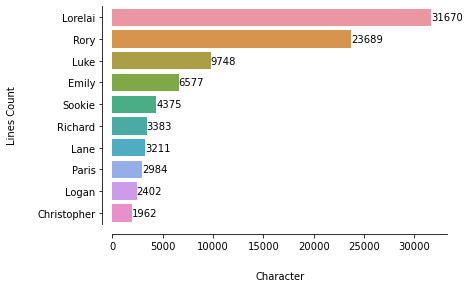

In [7]:
# Barplot of said lines 

# Set style 
sns.set_palette('Set2')

# Plot 
fig = sns.barplot(data=char_lines[:10], x="Line", y="Character")

# Customize
plt.ylabel("Lines Count", labelpad=20)
plt.xlabel("Character",labelpad=20)
sns.despine(offset=10)

for i in fig.containers:
    fig.bar_label(i,)

In [8]:
# Number of character per season
seasons_char= script.groupby(['Season'], as_index=False)['Character'].nunique().sort_values('Character', ascending=False)

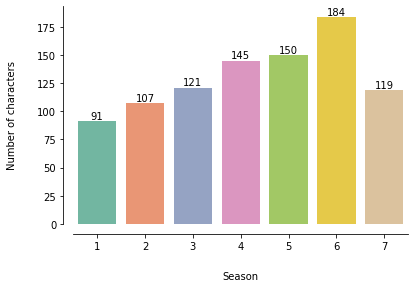

In [9]:
# Barplot of seasons characters distribution 
fig2 = sns.barplot(data=seasons_char, x="Season", y="Character")
plt.ylabel("Number of characters", labelpad=20)
plt.xlabel("Season",labelpad=20)
sns.despine(offset=10)
for i in fig2.containers:
    fig2.bar_label(i,)

In [10]:
# Number of lines per season
count_lines = script.groupby(['Season'], as_index=False)['Line'].count().sort_values('Line', ascending=True)

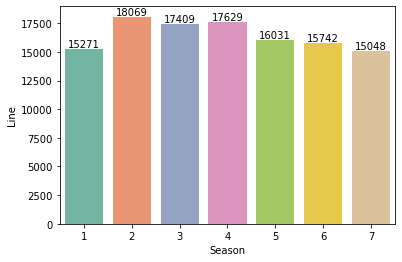

In [11]:
fig3 = sns.barplot(data=count_lines, x="Season", y="Line")
for i in fig3.containers:
    fig3.bar_label(i,)

In [12]:
# Import stopwords 
stop_words = stopwords.words('english')
stop_words.extend(["uh","oh","okay","im","dont", "know", "yeah", "thats", "youre", "well", "what", "ok", "isnt", "dont",
                  "yes", "no", "theres", "cant", "didnt", "whats"])

In [13]:
# Characters lines 
lorelai = script[script['Character'] == "Lorelai"].reset_index(drop=True)
lorelai = lorelai['Line']
rory = script[script['Character'] == "Rory"].reset_index(drop=True)
rory = rory['Line']
luke = script[script['Character'] == "Luke"].reset_index(drop=True)
luke = luke['Line']


In [14]:
# Tokenize and clean data 
def clean_data(data):
    data = " ".join(data) # Join the text 
    data = re.sub(r'[^\w\s]', '', data) # Delete unwanted characters 
    tokens = data.split() 
    tokens = [word.lower() for word in tokens] # Lower all the letters 
    tokens = [word for word in tokens if not word in stop_words] # Ignore stopwords
    text = " ".join(tokens) # Create one joined sentence  
    return text

In [15]:
# Generate wordcloud 
def generate_wordcloud(text):
    word_cloud= WordCloud(width=1920,height=1080, background_color="white", colormap='tab20b', collocations=False).generate(text)
    plt.figure(figsize=(12,12))
    plt.imshow(word_cloud)

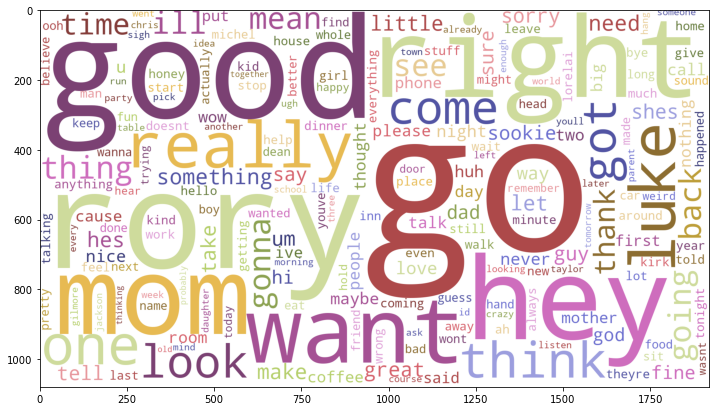

In [16]:
lorelai_text = clean_data(lorelai)
generate_wordcloud(lorelai_text)

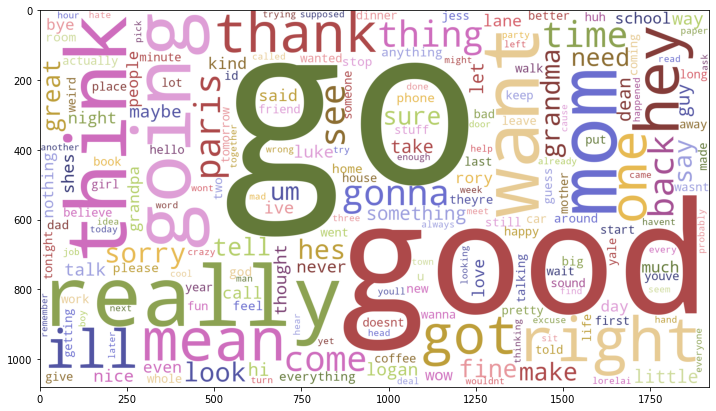

In [17]:
rory_text = clean_data(rory)
generate_wordcloud(rory_text)

In [111]:
# Create a list of numbers 
input = 23041
output = list(range(input + 1))
scenes = list(np.repeat(output, 5))

In [112]:
script['Scene'] = scenes[5:] # Add number of a scene to column 

In [199]:
char_dict = {}
for group, group_df in script.groupby(['Scene']): # Group by scenes of 5 
    
    # Get the list of characters that appear in scene, sorted alphabetically
    char_in_scene = str(group_df['Character'].sort_values().unique().tolist())[1:-1].replace("'","")

    if char_in_scene in char_dict.keys():
        char_dict[char_in_scene] +=1
    else:
        char_dict[char_in_scene] = 1

In [200]:
sorted_dict={}
for k, v in sorted(char_dict.items(), key=lambda item: item[1],reverse = True): # Return second element of item
    sorted_dict[k] = v

In [280]:
# Get the relations of 2 characters from the list 
relations=[]
for x in characters['name']:
    for y in characters['name']:
            if x!=y and x<y:
                relations.append(x+ ', ' + y)

In [282]:
rel_dict = {x:sorted_dict[x]for x in relations if x in sorted_dict.keys()}

In [283]:
final_dict={}
for k, v in sorted(rel_dict.items(), key=lambda item: item[1],reverse = True):
    final_dict[k] = v

In [320]:
final_df = pd.DataFrame([{"target": name1, "count": value} 
                         for name1, value in final_dict.items()])
final_df[['source', 'target']] = final_df['target'].str.split(',', 1, expand=True)

cols = final_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
final_df = final_df[cols]
final_df

,source,target,count
0,Lorelai,Rory,3076
1,Lorelai,Luke,1667
2,Emily,Lorelai,867
3,Lorelai,Sookie,846
4,Logan,Rory,559
...,...,...,...
258,Nicole,Taylor,1
259,Paris,Terrance,1
260,Raj,Rory,1
261,Rory,Terrance,1
